# Unit 4: Linear Regression with Scikit Learn:



##Task A: Correlation

                  Country Name Country Code        Series Name  Series Code  \
0                        Aruba          ABW  Population, total  SP.POP.TOTL   
1                  Afghanistan          AFG  Population, total  SP.POP.TOTL   
2  Africa Eastern and Southern          AFE  Population, total  SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total  SP.POP.TOTL   
4                      Albania          ALB  Population, total  SP.POP.TOTL   

        1960       1961       1962       1963       1964       1965  ...  \
0      54211      55438      56225      56695      57032      57360  ...   
1    8996967    9169406    9351442    9543200    9744772    9956318  ...   
2  130836765  134159786  137614644  141202036  144920186  148769974  ...   
3   96396419   98407221  100506960  102691339  104953470  107289875  ...   
4    1608800    1659800    1711319    1762621    1814135    1864791  ...   

        2012       2013       2014       2015       2016       2017 

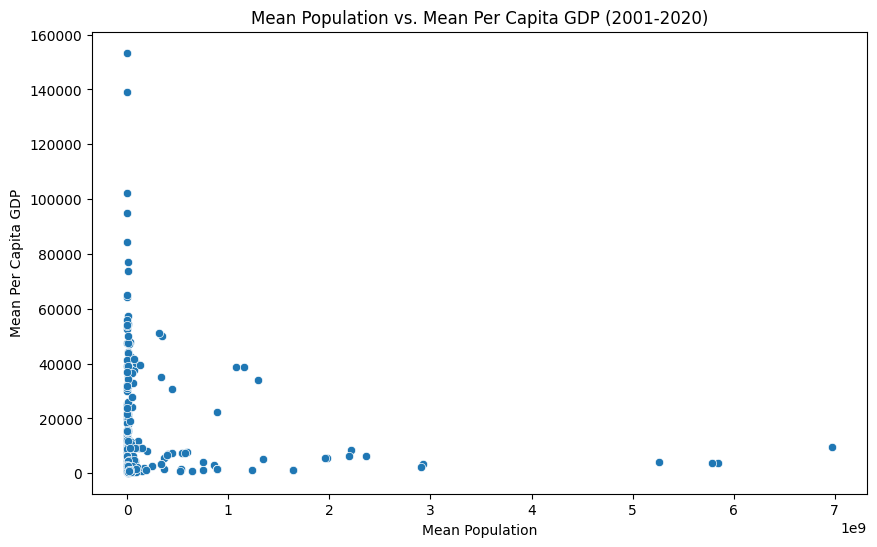

Pearson Correlation Coefficient: -0.100
P-value: 0.111


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Step 2: Load the data
population_data = pd.read_csv('Unit04 Global_Population.csv')
gdp_data = pd.read_csv('Unit04 Global_GDP.csv')

print(population_data.head())
print(gdp_data.head())

# Step 3: Extract relevant columns for 2001-2020 (only until 2020 because the GDP data is not available for 2021) and 'Country Name'
years = [str(year) for year in range(2001, 2021)]

# Adjust the analysis to ensure we have consistent data
population_data = population_data[['Country Name'] + years]
gdp_data = gdp_data[['Country Name'] + years]

# Step 4: Handle missing values by filling them with the mean for each country
# Convert the year columns to numeric before calculating the mean
for year in years:
    population_data[year] = pd.to_numeric(population_data[year], errors='coerce')
    gdp_data[year] = pd.to_numeric(gdp_data[year], errors='coerce')

population_data.fillna(population_data.mean(axis=1, numeric_only=True), inplace=True)
gdp_data.fillna(gdp_data.mean(axis=1, numeric_only=True), inplace=True)

# Step 5: Calculate the mean population and mean GDP for each country (2001-2021)
population_data['Mean_Population'] = population_data[years].mean(axis=1)
gdp_data['Mean_GDP'] = gdp_data[years].mean(axis=1)

# Step 6: Merge the datasets based on 'Country Name'
merged_data = pd.merge(
    population_data[['Country Name', 'Mean_Population']],
    gdp_data[['Country Name', 'Mean_GDP']],
    on='Country Name'
)

# Step 7: Calculate mean per capita GDP
# Replace infinite values with NaN
merged_data['Mean_Per_Capita_GDP'] = merged_data['Mean_GDP'] / merged_data['Mean_Population']
merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)


# Step 8: Plot the relationship between mean population and mean per capita GDP
# Drop rows with NaN values before plotting
merged_data_cleaned = merged_data.dropna(subset=['Mean_Population', 'Mean_Per_Capita_GDP'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mean_Population', y='Mean_Per_Capita_GDP', data=merged_data_cleaned)
plt.title('Mean Population vs. Mean Per Capita GDP (2001-2020)')
plt.xlabel('Mean Population')
plt.ylabel('Mean Per Capita GDP')
plt.show()

# Step 9: Calculate the Pearson Correlation Coefficient
# Use the cleaned data for correlation calculation
correlation_coefficient, p_value = pearsonr(merged_data_cleaned['Mean_Population'], merged_data_cleaned['Mean_Per_Capita_GDP'])
print(f'Pearson Correlation Coefficient: {correlation_coefficient:.3f}')
print(f'P-value: {p_value:.3f}')

**Interpretation:**

[Text]

##Task B: Regression:

Regression Line: y = -0.000 * x + 15463.860


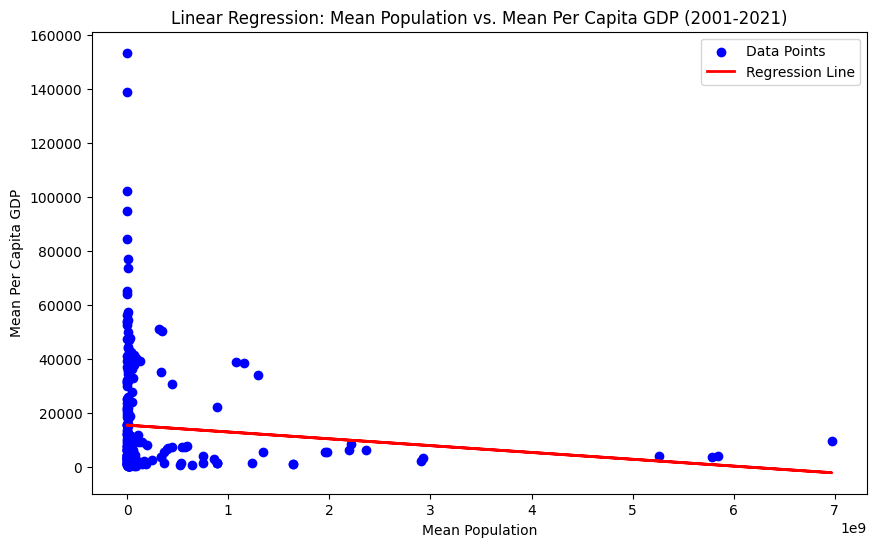

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.553
Date:                Tue, 12 Nov 2024   Prob (F-statistic):              0.111
Time:                        14:25:13   Log-Likelihood:                -2929.6
No. Observations:                 257   AIC:                             5863.
Df Residuals:                     255   BIC:                             5870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.546e+04   1414.558     10.932      0.0

In [ ]:
# Step 1: Import necessary libraries for linear regression
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Step 2: Prepare the data for linear regression
# Drop rows with NaN values in 'Mean_Population' and 'Mean_Per_Capita_GDP'
merged_data_cleaned = merged_data.dropna(subset=['Mean_Population', 'Mean_Per_Capita_GDP'])

X = merged_data_cleaned['Mean_Population'].values.reshape(-1, 1)  # Independent variable
y = merged_data_cleaned['Mean_Per_Capita_GDP'].values  # Dependent variable

# Step 3: Fit the linear regression model using sklearn
model = LinearRegression()
model.fit(X, y)

# Step 4: Get the regression line parameters
slope = model.coef_[0]
intercept = model.intercept_

print(f'Regression Line: y = {slope:.3f} * x + {intercept:.3f}')

# Step 5: Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Mean Population vs. Mean Per Capita GDP (2001-2021)')
plt.xlabel('Mean Population')
plt.ylabel('Mean Per Capita GDP')
plt.legend()
plt.show()

# Step 6: Use statsmodels for more detailed output (optional)
X_with_const = sm.add_constant(X)  # Add a constant (intercept) to the model
model_sm = sm.OLS(y, X_with_const).fit()

# Display summary of the regression
print(model_sm.summary())

**Interpretation:**

[Text]